In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from PIL import Image
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
X_train = X_train / 255.0
X_test = X_test /255.0

In [9]:
from keras.layers import Conv2D, MaxPooling2D

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))

In [12]:
model.add(MaxPooling2D(2,2))

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

In [14]:
model.add(MaxPooling2D(2,2))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(128, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
epoch_history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.25)

Epoch 1/20
1407/1407 [==============================] - 6s 3ms/step - loss: 0.6420 - accuracy: 0.7695 - val_loss: 0.3921 - val_accuracy: 0.8549
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3266 - accuracy: 0.8789 - val_loss: 0.3066 - val_accuracy: 0.8875
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2724 - accuracy: 0.9019 - val_loss: 0.2763 - val_accuracy: 0.8977
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2302 - accuracy: 0.9138 - val_loss: 0.2596 - val_accuracy: 0.9029
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1987 - accuracy: 0.9268 - val_loss: 0.2733 - val_accuracy: 0.9012
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1741 - accuracy: 0.9358 - val_loss: 0.2628 - val_accuracy: 0.9055
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1544 - accuracy: 0.9419 - val_loss: 0.2395 - val_accuracy:

In [ ]:
#epochs를 과도하게 설정해 overfitting이 된 것으로 보인다.

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6050 - accuracy: 0.9021


In [22]:
print('loss : {}\naccuracy : {}'.format(test_loss, test_accuracy))

loss : 0.6050017476081848
accuracy : 0.9021000266075134


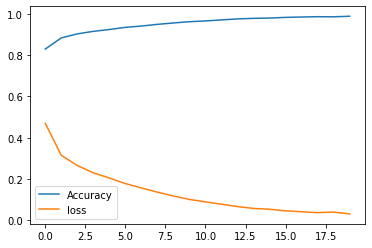

In [25]:
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['loss'])
plt.legend(['Accuracy', 'loss'])
plt.show()

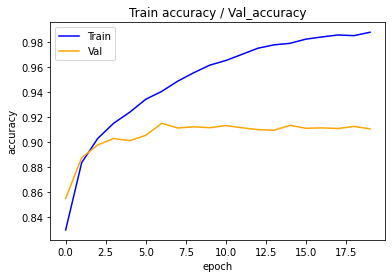

In [27]:
plt.plot(epoch_history.history['accuracy'], color = 'blue')
plt.plot(epoch_history.history['val_accuracy'], color = 'orange')
plt.title('Train accuracy / Val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'])
plt.show()

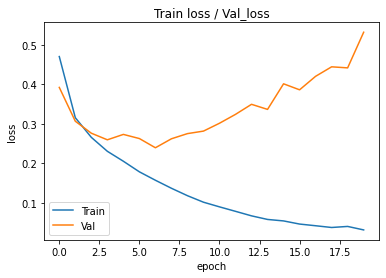

In [28]:
plt.plot(epoch_history.history['loss'])
plt.plot(epoch_history.history['val_loss'])
plt.title('Train loss / Val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

In [ ]:
#epochs 수치를 6정도로 했어야 적당했을 것 같다.